# Resources

[Download the dataset here](https://data.mendeley.com/datasets/zhj366m53p/2)


 ### IMPORT LIBRARIES

In [35]:
# -----------------------------------------------------
# 1. IMPORT LIBRARIES
# -----------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###  LOAD THE DATA

In [36]:

# -----------------------------------------------------
# 2. LOAD THE DATA
# -----------------------------------------------------
df = pd.read_csv("MoMTSim_20240722202413_1000_dataset.csv")

###  EXPLORE THE DATA

In [37]:
# -----------------------------------------------------
# 3. EXPLORE THE DATA
# -----------------------------------------------------

# 3.1 View the first few rows to understand the data structure
print("First few rows of the dataset:")
display(df.head())

First few rows of the dataset:


,step,transactionType,amount,initiator,oldBalInitiator,newBalInitiator,recipient,oldBalRecipient,newBalRecipient,isFraud
0,0,PAYMENT,579.16,4018807983755588,29.32,29.32,30-0000345,0.00,0.00,0
1,0,TRANSFER,39.03,4610593854752035,39.03,0.00,4944921135715488,55.94,94.98,1
2,0,TRANSFER,21.78,4840578447365454,21.78,0.00,4305579785620656,58.09,79.88,1
3,0,PAYMENT,570.22,4958066799829630,5.29,5.29,00-0000388,0.00,0.00,0
4,0,PAYMENT,574.80,4149196095918843,82.63,82.63,80-0005320,0.00,0.00,0


#### Dimensions of the DataFrame

In [38]:
# 3.2 Check the dimensions of the DataFrame
print(f"\nShape of the DataFrame: {df.shape}")



Shape of the DataFrame: (4225958, 10)


#### Summary Statistics

In [39]:
# 3.3 Get a quick statistical summary of the numeric columns
print("\nStatistical summary of numeric columns:")
display(df.describe())


Statistical summary of numeric columns:


,step,amount,initiator,oldBalInitiator,newBalInitiator,oldBalRecipient,newBalRecipient,isFraud
count,4.225958e+06,4.225958e+06,4.225958e+06,4.225958e+06,4.225958e+06,4.225958e+06,4.225958e+06,4.225958e+06
mean,9.811771e+01,5.302139e+04,4.495008e+15,2.246055e+07,2.246527e+07,1.685005e+06,1.703967e+06,5.284288e-01
std,5.573710e+01,2.708194e+06,2.912521e+14,6.418504e+07,6.421561e+07,6.795783e+06,6.802160e+06,4.991912e-01
min,0.000000e+00,0.000000e+00,4.000000e+15,-1.999926e+05,-1.999926e+05,-7.477966e+04,0.000000e+00,0.000000e+00
25%,5.000000e+01,9.444000e+01,4.237994e+15,4.681000e+01,0.000000e+00,3.345156e+04,4.251237e+04,0.000000e+00
50%,9.900000e+01,5.966900e+02,4.491576e+15,3.655435e+03,0.000000e+00,2.007614e+05,2.042479e+05,1.000000e+00
75%,1.470000e+02,1.708469e+04,4.747260e+15,2.344082e+05,8.150306e+04,2.002134e+06,2.041814e+06,1.000000e+00
max,1.920000e+02,7.654805e+08,5.000000e+15,6.409231e+08,6.409231e+08,3.810134e+08,3.813883e+08,1.000000e+00


#### Missing Values

In [40]:
# 3.4 Check for missing values
print("\nNumber of missing values in each column:")
display(df.isnull().sum())


Number of missing values in each column:


step               0
transactionType    0
amount             0
initiator          0
oldBalInitiator    0
newBalInitiator    0
recipient          0
oldBalRecipient    0
newBalRecipient    0
isFraud            0
dtype: int64

### VISUALIZATIONS

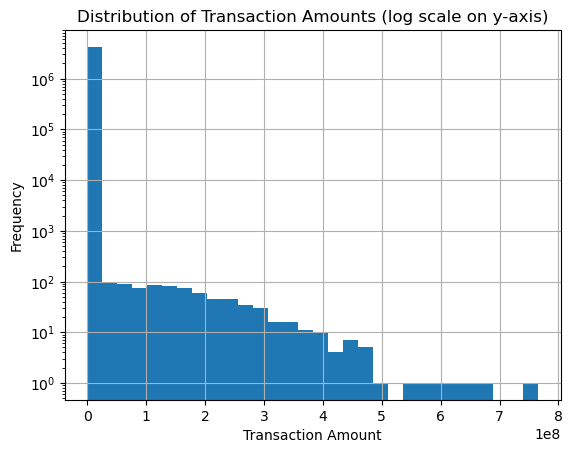

In [41]:
# -----------------------------------------------------
# 4. BASIC VISUALIZATIONS
# -----------------------------------------------------

# 4.1 Histogram of the transaction amount
plt.figure()
df['amount'].hist(bins=30)
plt.yscale("log")  # Log scale on the y-axis
plt.title("Distribution of Transaction Amounts (log scale on y-axis)")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

#### Bar chart of Transaction Type

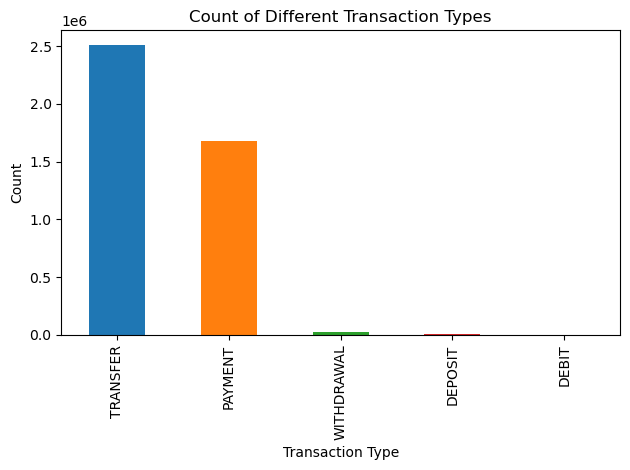

In [42]:
# 4.2 Count plot (bar chart) of transaction type
# Count the occurrences of each transaction type
transaction_counts = df['transactionType'].value_counts()

# Generate a distinct color for each bar from the default color cycle
colors = [f'C{i}' for i in range(len(transaction_counts))]

plt.figure()
transaction_counts.plot(kind='bar', color=colors)
plt.title("Count of Different Transaction Types")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.tight_layout()  # Ensures labels aren't cut off
plt.show()

#### Correlation matrix

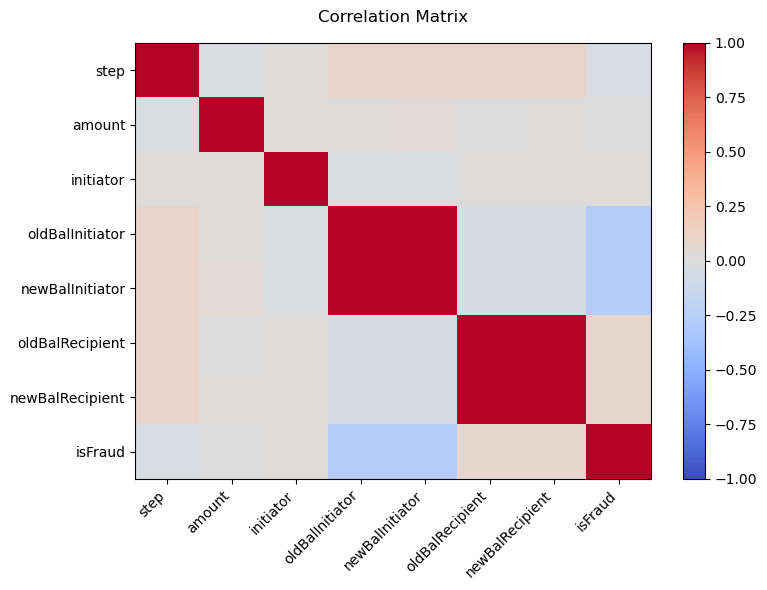

In [43]:
# 4.3 Correlation matrix (for numeric columns)
# Calculate the correlation matrix (numeric_only=True to handle numeric columns)
corr = df.corr(numeric_only=True)

# Create the figure
plt.figure(figsize=(8,6))

# Display the correlation matrix
im = plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1, aspect='auto')

# Add the colorbar
plt.colorbar(im)

# Label the axes with the column names
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.yticks(range(len(corr.columns)), corr.columns)

# Add a title
plt.title('Correlation Matrix', pad=15)

# Adjust layout so labels don't get cut off
plt.tight_layout()

# Show the plot
plt.show()

In [44]:
print("\nCorrelation matrix values:")
display(corr)


Correlation matrix values:


,step,amount,initiator,oldBalInitiator,newBalInitiator,oldBalRecipient,newBalRecipient,isFraud
step,1.000000,-0.017772,0.000788,0.108630,0.107995,0.104394,0.104241,-0.028868
amount,-0.017772,1.000000,0.000258,0.001075,0.033095,-0.001336,0.001777,-0.007688
initiator,0.000788,0.000258,1.000000,-0.013033,-0.013040,0.002486,0.002523,0.011919
oldBalInitiator,0.108630,0.001075,-0.013033,1.000000,0.999272,-0.047689,-0.047417,-0.273513
newBalInitiator,0.107995,0.033095,-0.013040,0.999272,1.000000,-0.047767,-0.047629,-0.273949
oldBalRecipient,0.104394,-0.001336,0.002486,-0.047689,-0.047767,1.000000,0.999374,0.083863
newBalRecipient,0.104241,0.001777,0.002523,-0.047417,-0.047629,0.999374,1.000000,0.085447
isFraud,-0.028868,-0.007688,0.011919,-0.273513,-0.273949,0.083863,0.085447,1.000000


# Assignment

1. **Probability Distributions & Summary Statistics:**  
   - Compute the mean and standard deviation of the `amount` column.  
   - Create a boxplot for `amount` to visualize its distribution.  
   - Identify and discuss any potential outliers.

2. **Conditional Probabilities:**  
   - Using the `isFraud` column which indicates if a transaction is fraudulent, compute the probability of fraud in the dataset overall.  
   - Condition on a categorical feature (e.g., `transactionType`) and compute the probability of fraud given that `transactionType` is `'X'` (choose any specific type).  
   - Compare the conditional probability to the overall fraud probability. Discuss any insights or differences you observe.

3. **Report:**  
   - Summarize all findings in a short paragraph. Highlight key insights about the distribution of transactions, the fraud rates, and any interesting patterns.  

**Instructions:**  
- Use code cells to perform your calculations and visualizations.  
- Write brief markdown cells explaining your steps and interpreting your results.
- Indicate your name and student registration number in a markdown cell
- Submit your notebook via muele
- Deadline for submiting this individual assignment is April 14, 2025 at 11:59PM EAT

Have fun exploring the data!
